In [23]:
import cv2
import imutils
import numpy as np
from matplotlib import pyplot as plt

from imutils.object_detection import non_max_suppression


In [24]:

car_cascade = cv2.CascadeClassifier('cars.xml')

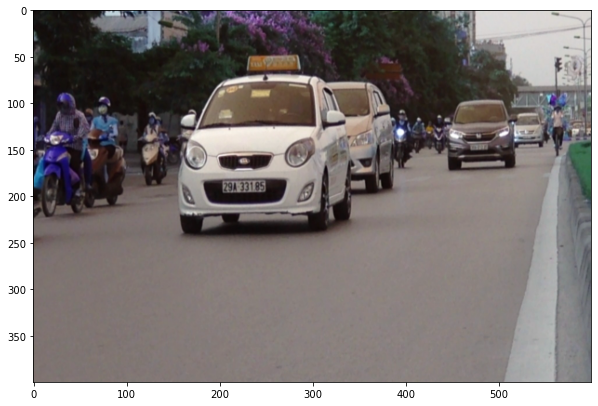

In [25]:

img = cv2.imread('C:\\Users\\mohid\\Music/sample.jpg',cv2.IMREAD_COLOR)
img = cv2.resize(img, (600,400) )
plt.figure(figsize=(10,20))
plt.imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 


In [26]:
cars = car_cascade.detectMultiScale(gray, 1.1, 1)
ncars=0
for (x, y, w, h) in cars:
    a=cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)
    cv2.putText(a, 'car', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)   
    ncars = ncars + 1
    





In [27]:
gray = cv2.bilateralFilter(gray, 13, 15, 15) 
edged = cv2.Canny(gray, 30, 200) 
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None



    
       

In [28]:
for c in contours:
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)
    mask = np.zeros(gray.shape,np.uint8)
    new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
    new_image = cv2.bitwise_and(img,img,mask=mask)

In [29]:
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]


In [30]:
HOGCV = cv2.HOGDescriptor()
HOGCV.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [31]:

def Detector(frame):
    ## USing Sliding window concept
    rects, weights = HOGCV.detectMultiScale(frame, winStride=(4, 4), padding=(8, 8), scale=1.03)
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
    c = 1
    for x, y, w, h in pick:
        cv2.rectangle(frame, (x, y), (w, h), (139, 34, 104), 2)
        cv2.rectangle(frame, (x, y - 20), (w,y), (139, 34, 104), -1)
        cv2.putText(frame, f'Person{c}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        c += 1

    cv2.putText(frame, f'Total Persons : {c - 1}', (20, 450), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255, 255,255), 2)
    plt.imshow(img)
    return frame



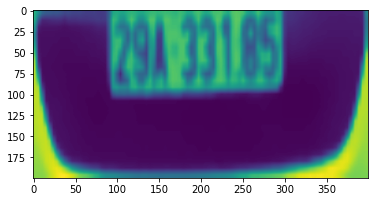

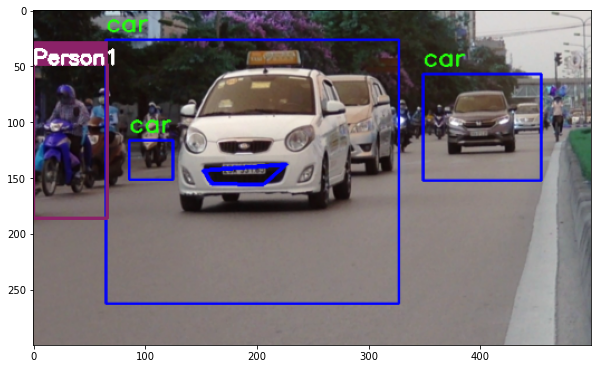

In [32]:


img = cv2.resize(img,(500,300))
Cropped = cv2.resize(Cropped,(400,200))
img = Detector(img)


plt.imshow(Cropped)
plt.figure(figsize=(10,20))
plt.imshow(img)


